In [1]:
from stable_baselines3 import A2C, PPO
from stable_baselines3.common.env_checker import check_env
from meta.custom_env import CustomEnv
from utils.fetch_data import Api, fetch_data

data = fetch_data(Api.YAHOO, 'BTC-USD', '2015-01-01', '2023-01-01')

env = CustomEnv(data, action_space=3, observation_space=5)
check_env(env)

model = A2C("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=10000, log_interval=1000)

[*********************100%***********************]  1 of 1 completed


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 2.92e+03 |
|    ep_rew_mean        | 1.81e+03 |
| time/                 |          |
|    fps                | 267      |
|    iterations         | 1000     |
|    time_elapsed       | 18       |
|    total_timesteps    | 5000     |
| train/                |          |
|    entropy_loss       | -0.863   |
|    explained_variance | 0.0      |
|    learning_rate      | 0.0007   |
|    n_updates          | 999      |
|    policy_loss        | 1.88     |
|    value_loss         | 6.97     |
------------------------------------
------------------------------------------
| rollout/              |                |
|    ep_len_mean        | 2.92e+03       |
|    ep_rew_mean        | 2.08e+03       |
| time/                 |                |
|    fps                | 284            |
|    iterations    

[*********************100%***********************]  1 of 1 completed


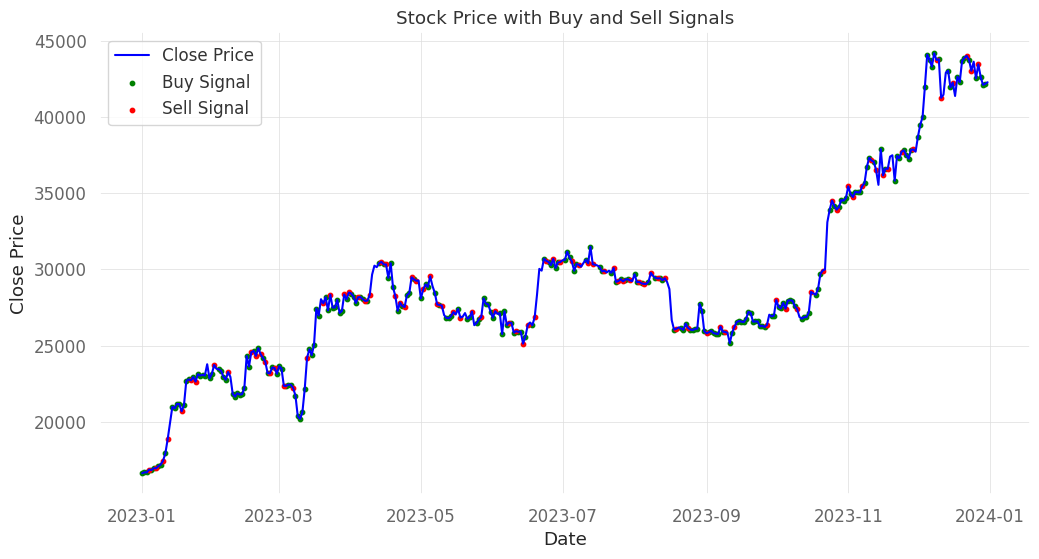

                    Strategy
------------------  ----------
Start Period        2023-01-01
End Period          2023-12-30
Risk-Free Rate      0.0%
Time in Market      62.0%

Cumulative Return   29.28%
CAGR﹪              19.51%

Sharpe              2.1
Prob. Sharpe Ratio  99.89%
Sortino             4.62
Sortino/√2          3.27
Omega               1.92

Max Drawdown        -3.42%
Longest DD Days     83

Gain/Pain Ratio     0.92
Gain/Pain (1M)      12.51

Payoff Ratio        1.84
Profit Factor       1.92
Common Sense Ratio  2.9
CPC Index           1.81
Tail Ratio          1.51
Outlier Win Ratio   11.21
Outlier Loss Ratio  4.51

MTD                 3.39%
3M                  8.88%
6M                  7.44%
YTD                 29.28%
1Y                  29.28%
3Y (ann.)           19.51%
5Y (ann.)           19.51%
10Y (ann.)          19.51%
All-time (ann.)     19.51%

Avg. Drawdown       -0.75%
Avg. Drawdown Days  10
Recovery Factor     7.67
Ulcer Index         0.01
Serenity Index      5.24


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


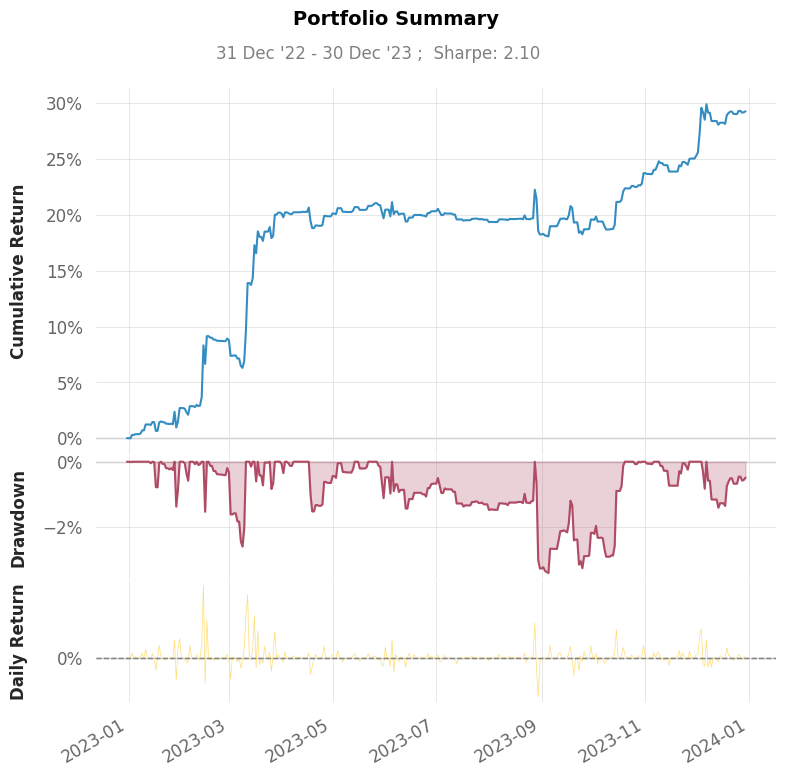

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


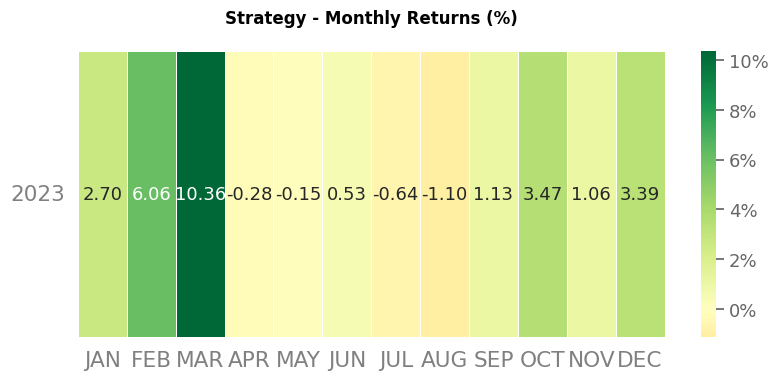

In [2]:
import pandas as pd
import quantstats as qs
from utils.plot_buy_and_sell import plot_buy_and_sell

test_data = fetch_data(Api.YAHOO, 'BTC-USD', '2023-01-01', '2024-01-01')

test_env = CustomEnv(test_data, action_space=3, observation_space=5)
check_env(test_env)

portfolio_values = []

observation, info = test_env.reset()

while True:
    action, _states = model.predict(observation)

    observation, reward, terminated, truncated, info = test_env.step(action)
    done = terminated or truncated
    portfolio_values.append(info['portfolio_value'])

    if done:
        break

actions_data = test_env.close()
actions_data.index = pd.to_datetime(test_data.index)

plot_buy_and_sell(actions_data)

dates = pd.date_range(start=test_data.index[0], periods=len(portfolio_values), freq="D")
portfolio_series = pd.Series(portfolio_values, index=dates)

returns = portfolio_series.pct_change().fillna(0)

qs.reports.basic(returns)